# Solving N-Queen Problem using Tabu Search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the initial state
def get_initial_state(board_size):
    queens = list(range(board_size))
    random.shuffle(queens)
    return queens

In [3]:
# Calculate the number of attacking queens on the board
def num_attacking_queens(queens):
    board_size = len(queens)
    num_attacks = 0
    for i in range(board_size):
        for j in range(i + 1, board_size):
            if queens[i] == queens[j] or abs(queens[i] - queens[j]) == j - i:
                num_attacks += 1
    return num_attacks

In [4]:
# Get the best move
def get_best_move(queens, tabu_list):
    board_size = len(queens)
    best_move = None
    best_num_attacks = board_size * (board_size - 1) // 2
    for i in range(board_size):
        for j in range(board_size):
            if queens[i] != j:
                new_queens = queens.copy()
                new_queens[i] = j
                if str(new_queens) not in tabu_list:
                    num_attacks = num_attacking_queens(new_queens)
                    if num_attacks < best_num_attacks:
                        best_move = (i, j)
                        best_num_attacks = num_attacks
    return best_move

In [5]:
# Update the tabu list
def update_tabu_list(tabu_list, tabu_tenure, move):
    tabu_list.append(str(move))
    if len(tabu_list) > tabu_tenure:
        tabu_list.pop(0)

In [6]:
# Tabu search
def tabu_search(num_iterations, tabu_tenure, max_non_improvement, queens):
    num_non_improvement = 0
    best_queens = queens
    best_num_attacks = num_attacking_queens(queens)
    tabu_list = []

    for i in range(num_iterations):
        move = get_best_move(queens, tabu_list)
        if move is not None:
            queens[move[0]] = move[1]
            update_tabu_list(tabu_list, tabu_tenure, move)
            num_attacks = num_attacking_queens(queens)
            if num_attacks < best_num_attacks:
                best_queens = queens
                best_num_attacks = num_attacks
                num_non_improvement = 0
        else:
            num_non_improvement += 1
            if num_non_improvement >= max_non_improvement:
                break

    return best_queens, num_attacks

In [7]:
# Solve the problem using Tabu Search

# Set board size for nxn Queeen problem
board_size = 7

# Define the number of iterations for the search
num_iterations = 2000

# Define the tabu tenure
tabu_tenure = 10

# Define the number of moves without improvement before considering a solution is stuck
max_non_improvement = 50

best_board, num_attacks=tabu_search(num_iterations, tabu_tenure, max_non_improvement, get_initial_state(board_size))

In [8]:
print("Best found boatd is ", best_board)
print("Number of attacks in the best found board is ", num_attacks)

Best found boatd is  [4, 6, 1, 5, 2, 0, 3]
Number of attacks in the best found board is  0


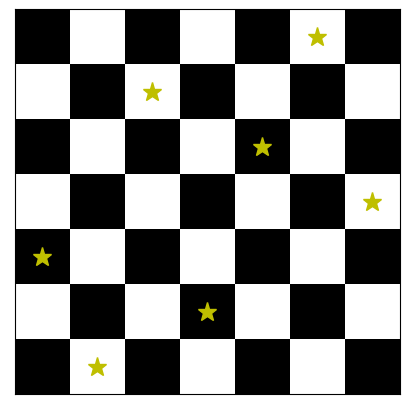

In [9]:
# Visualizae the solution
all_queens = range(board_size)
states=[]
soln=np.array(best_board)
for i in all_queens:
    for j in all_queens:
        if best_board[j] == i:
            # There is a queen in column j, row i.
            states.append(True)
        else:
            states.append(None)     
            
states=np.array(states).reshape(-1, board_size)

fig = plt.figure(figsize=(5,5))
# # Convert 2D board to 1D marker list
markers = [
    x.tolist().index(True) if True in x.tolist() else None
    for x in np.transpose(states)
]
res = np.add.outer(range(board_size), range(board_size)) % 2
plt.imshow(res, cmap="binary_r")
plt.xticks([])
plt.yticks([])
plt.plot(markers, marker="*", linestyle="None", markersize=100/board_size, color="y")
# plt.savefig('CH06_F17_NQueen.png', format='png', dpi=300)